# Predicting Credit Card Default Status

In [95]:
# import stuffs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

from imblearn.over_sampling import SMOTE

## setting color palettes
#sns.set_palette("colorblind")
diverging_colors = sns.color_palette("RdBu", 10)
sns.set_palette(diverging_colors)

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

# 1. Brief Introduction

## 1.1 The Data Set

The data set “card.csv” contains payment information of 30,000 credit card holders obtained from a bank in Taiwan. Each data sample is described by 23 feature attributes (columns B to X). The target feature (column Y) to be predicted is binary valued 0 (= not default) or 1 (= default).

## 1.2 Objective

Using this data set, we want to predict whether  a credit card holder will default payment in the next month. We will perform exploratory data analysis, data pre-processing, feature selection, model selection and model evaluation on this data set, which we will go through in the following chapters.


In [97]:
## Importing Data Set
df = pd.read_csv('card.csv', header = [1])
df.head()
df.info()
df.describe() #dataset does not contain null values and all columns are of type int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [98]:
df.median()

ID                             15000.5
LIMIT_BAL                     140000.0
SEX                                2.0
EDUCATION                          2.0
MARRIAGE                           2.0
AGE                               34.0
PAY_0                              0.0
PAY_2                              0.0
PAY_3                              0.0
PAY_4                              0.0
PAY_5                              0.0
PAY_6                              0.0
BILL_AMT1                      22381.5
BILL_AMT2                      21200.0
BILL_AMT3                      20088.5
BILL_AMT4                      19052.0
BILL_AMT5                      18104.5
BILL_AMT6                      17071.0
PAY_AMT1                        2100.0
PAY_AMT2                        2009.0
PAY_AMT3                        1800.0
PAY_AMT4                        1500.0
PAY_AMT5                        1500.0
PAY_AMT6                        1500.0
default payment next month         0.0
dtype: float64

In [99]:
df.mode().iloc[0]

ID                                1.0
LIMIT_BAL                     50000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          2.0
AGE                              29.0
PAY_0                             0.0
PAY_2                             0.0
PAY_3                             0.0
PAY_4                             0.0
PAY_5                             0.0
PAY_6                             0.0
BILL_AMT1                         0.0
BILL_AMT2                         0.0
BILL_AMT3                         0.0
BILL_AMT4                         0.0
BILL_AMT5                         0.0
BILL_AMT6                         0.0
PAY_AMT1                          0.0
PAY_AMT2                          0.0
PAY_AMT3                          0.0
PAY_AMT4                          0.0
PAY_AMT5                          0.0
PAY_AMT6                          0.0
default payment next month        0.0
Name: 0, dtype: float64

# 2. Exploratory Data Analysis

We will now perform data preparation based on our analyses from Sections 1 and 2 to ensure reliable input data for more accurate and effective results. First, we begin with data validation. From Section 1.2, we observe that there is no incomplete data as the dataset does not contain any null values, thus no correction is required. Although there are extreme values, the distributions of those variables are exponential and could be important, thus we will not be removing those values.

## 2.1. Analysis of Amount of Given Credit on Credit Card Holders

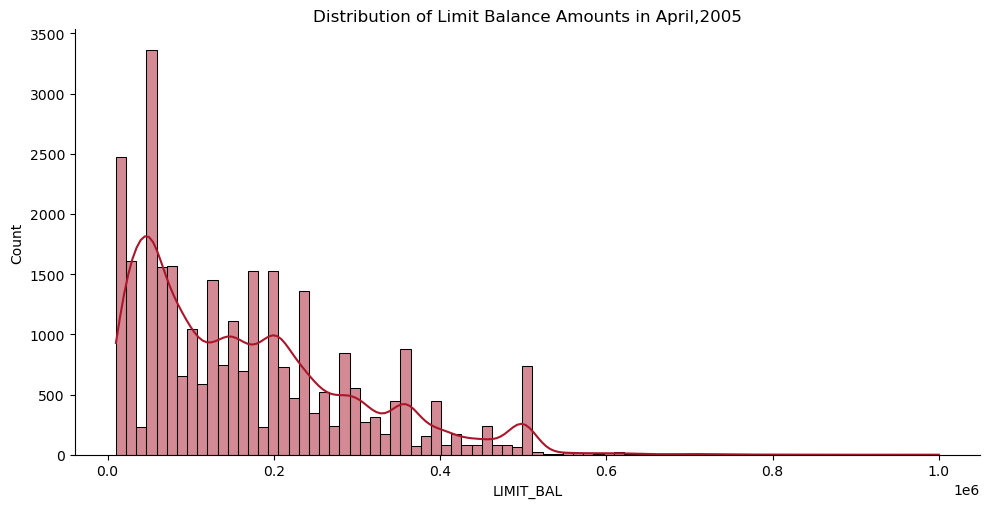

In [100]:
sns.displot(x = 'LIMIT_BAL', data = df, kde = True, aspect=2) 
## plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Distribution of Limit Balance Amounts in April,2005")
plt.show()

## 2.2. Analysis of Sex on Credit Card Holders
Female: 2, Male: 1

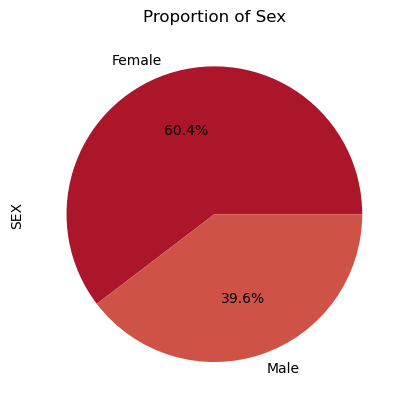

In [101]:
df["SEX"].replace({1: "Male", 2: "Female"}, inplace=True)
#Pie chart of proportion of gender
gender_counts = df['SEX'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Sex')
plt.show()

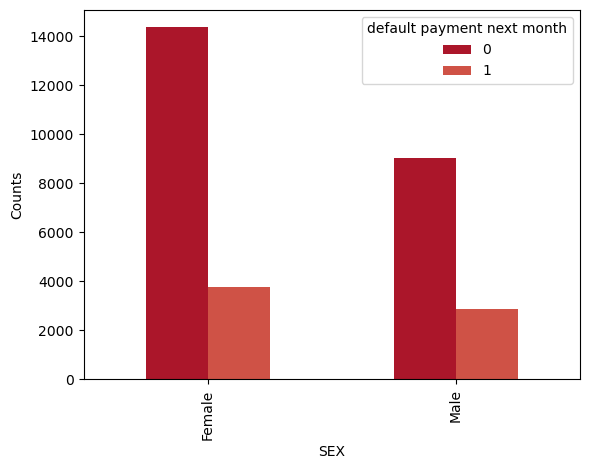

In [102]:
#Grouped bar chart
counts = df.groupby(['SEX', 'default payment next month']).size().unstack()
counts.plot(kind='bar', stacked=False)
plt.xlabel('SEX')
plt.ylabel('Counts')
plt.show()

## 2.3. Analysis of Education on Credit Card Holders

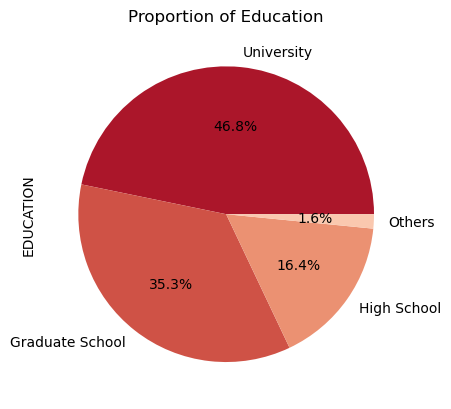

In [103]:
df["EDUCATION"].replace({0: "Others", 1: "Graduate School", 2: "University", 3: "High School", \
                         4: "Others", 5: "Others", 6: "Others"}, inplace=True)

#Pie chart of proportion of education
marriage_counts = df['EDUCATION'].value_counts()
marriage_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Education')
plt.show()

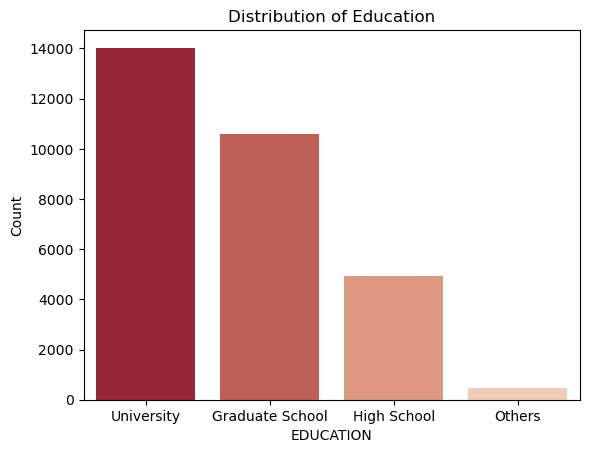

In [104]:
## Bar Graph of Distribution of Education
sns.countplot(x = 'EDUCATION', data = df) 
plt.ylabel('Count')
plt.title("Distribution of Education")
plt.show()

## 2.4. Analysis of Marital Status on Credit Card Holders

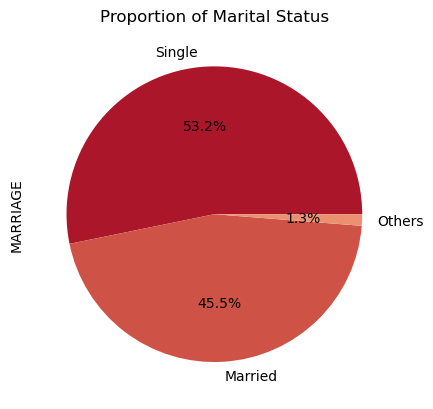

In [105]:
## Cleaning of Data
df['MARRIAGE'].replace({0:"Others", 1: "Married", 2: "Single", 3:"Others"}, inplace = True)

#Pie chart of proportion of marriage status
marriage_counts = df['MARRIAGE'].value_counts()
marriage_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Marital Status')
plt.show()

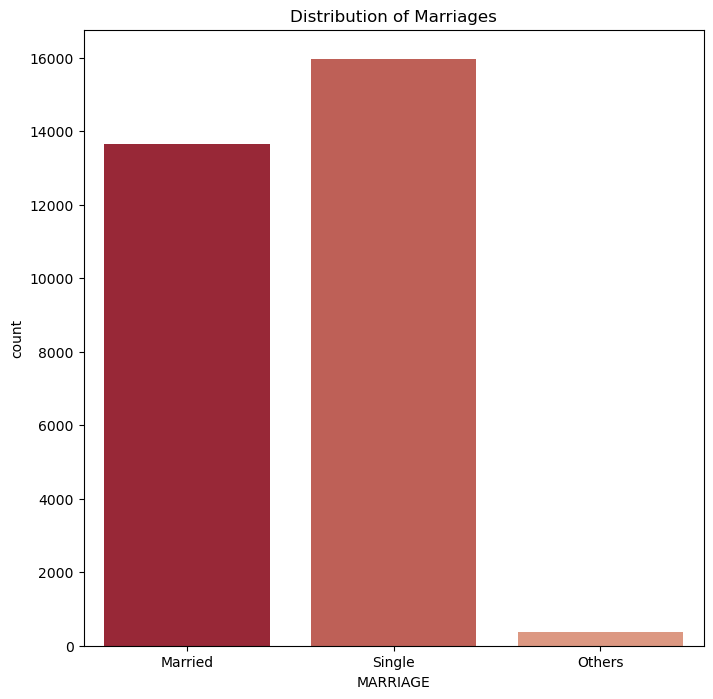

In [106]:
## Bar Graph of Distribution of Marriages
plt.figure(figsize = (8,8))
sns.countplot(x = "MARRIAGE", data = df)
plt.title("Distribution of Marriages")
plt.show()

## 2.5. Analysis of Age on Credit Card Holders

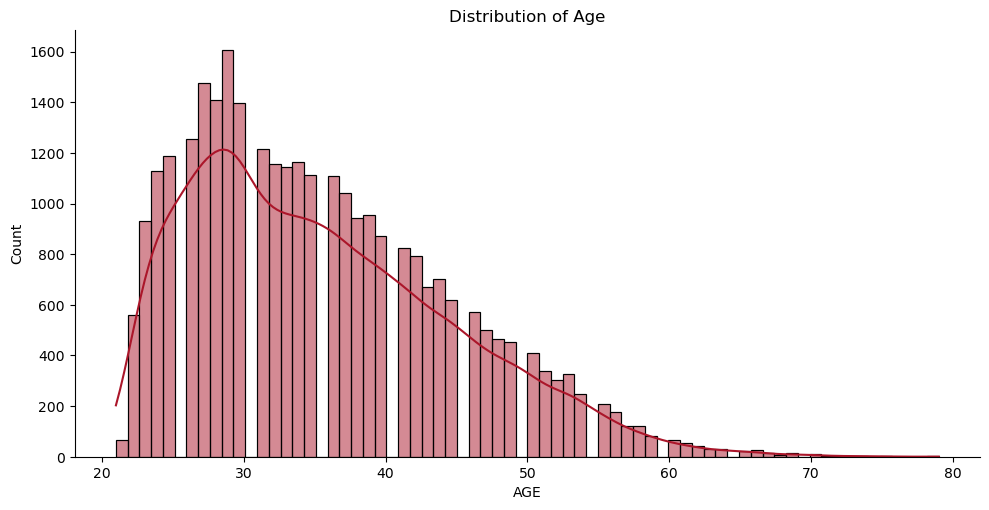

In [107]:
sns.displot(x = 'AGE', data = df, kde = True, aspect = 2) 
## plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Distribution of Age")
plt.show()

## 2.6. Analysis of History of Past Payment on Credit Card Holders

/var/folders/qr/nrj_437j6c97gz0h835gbb2r0000gn/T/ipykernel_15310/4082173630.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


Text(0.5, 1.0, 'Distribution Of History of Past Payment in April,2005')

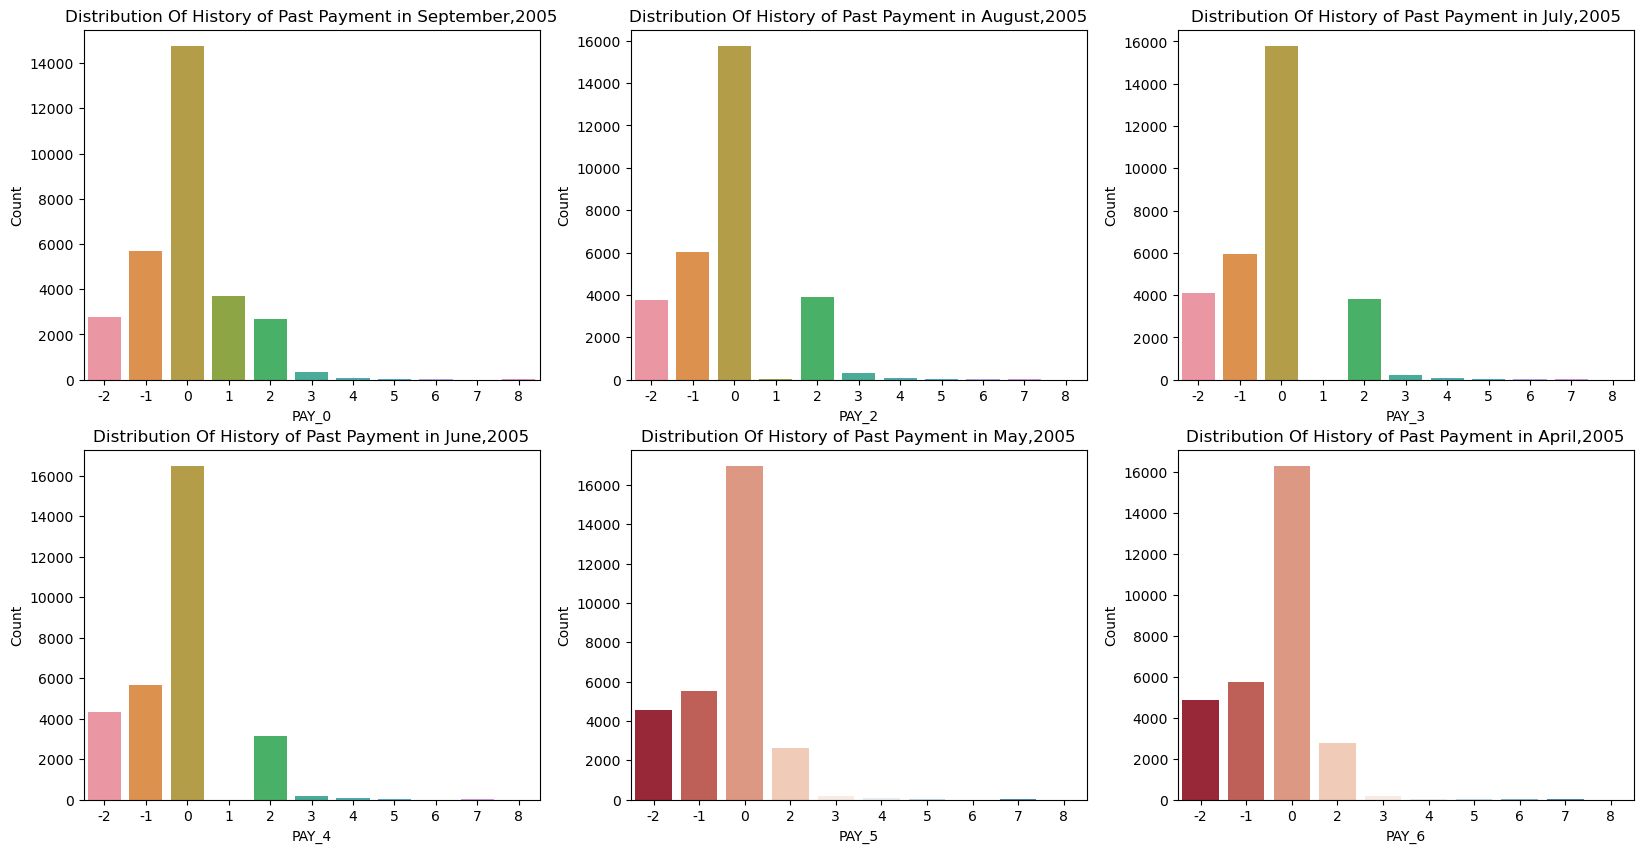

In [108]:
##The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 
##2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

# df.replace({"PAY_0": "PAY_Sep", "PAY_2": "PAY_Aug", "PAY_3": "PAY_Jul", "PAY_4": "PAY_Jun", "PAY_5": "PAY_May", "PAY_6": "PAY_Apr"}, inplace=True)
plt.subplots(figsize=(20,10))

#September 2005
plt.subplot(231)
# df["PAY_Sep"].replace({-2:-1,0:-1}, inplace=True)
sns.countplot(x = 'PAY_0', data = df) 
## plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Distribution Of History of Past Payment in September,2005")

#August 2005
plt.subplot(232)
# df["PAY_Aug"].replace({-2:-1,0:-1}, inplace=True)
sns.countplot(x = 'PAY_2', data = df) 
plt.ylabel('Count')
plt.title("Distribution Of History of Past Payment in August,2005")

#July 2005
plt.subplot(233)
# df["PAY_Jul"].replace({-2:-1,0:-1}, inplace=True)
sns.countplot(x = 'PAY_3', data = df) 
## plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Distribution Of History of Past Payment in July,2005")

#June 2005
plt.subplot(234)
# df["PAY_Jun"].replace({-2:-1,0:-1}, inplace=True)
sns.countplot(x = 'PAY_4', data = df) 
## plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Distribution Of History of Past Payment in June,2005")

#May 2005
plt.subplot(235)
# df["PAY_May"].replace({-2:-1,0:-1}, inplace=True)
sns.countplot(x = 'PAY_5', data = df) 
## plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Distribution Of History of Past Payment in May,2005")

#April 2005
plt.subplot(236)
# df["PAY_Apr"].replace({-2:-1,0:-1}, inplace=True)
sns.countplot(x = 'PAY_6', data = df) 
## plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Distribution Of History of Past Payment in April,2005")

## 2.7. Analysis of Amount of Bill Statement on Credit Card Holders

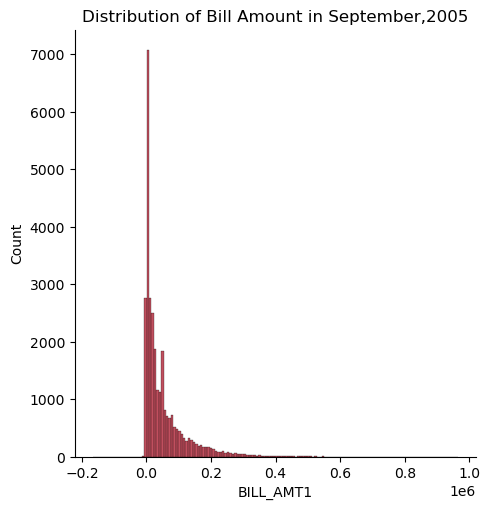

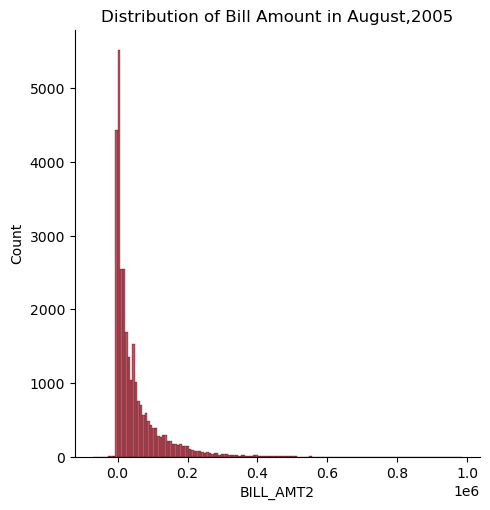

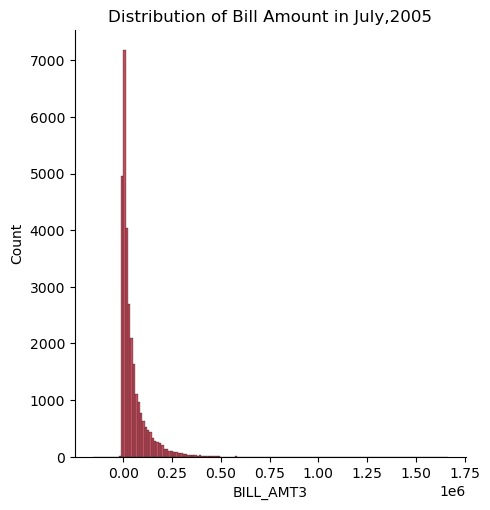

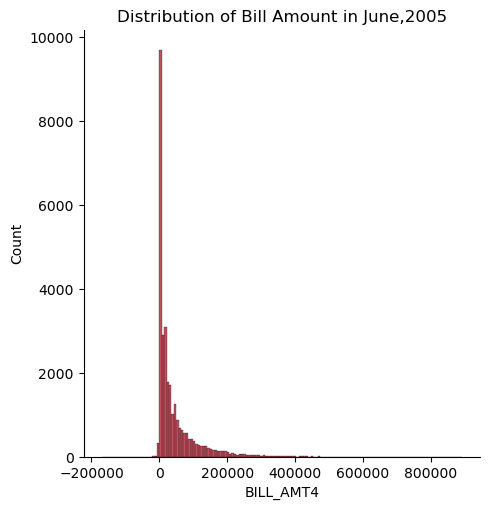

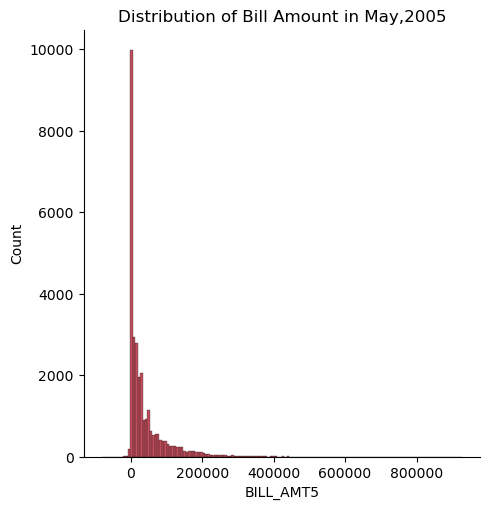

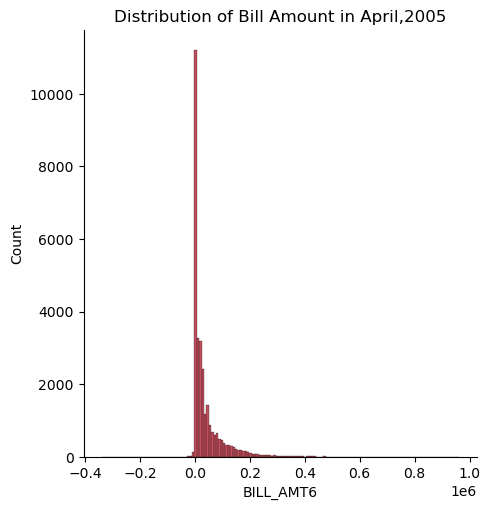

In [109]:
#Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; 
# . . .; X17 = amount of bill statement in April, 2005.

# plt.subplots(figsize=(20,10))

#September 2005
# plt.subplot(231)
sns.displot(x = 'BILL_AMT1', data = df, kde = False, bins = 150) #sns.displot(x = 'BILL_AMT1', data = df, kde = True) 
plt.ylabel('Count')
plt.title("Distribution of Bill Amount in September,2005")

#August 2005
# plt.subplot(232)
sns.displot(x = 'BILL_AMT2', data = df, kde = False, bins = 150) #sns.boxplot(x = 'BILL_AMT2', data = df) 
plt.ylabel('Count')
plt.title("Distribution of Bill Amount in August,2005")

#July 2005
# plt.subplot(233)
sns.displot(x = 'BILL_AMT3', data = df, kde = False, bins = 150) #sns.boxplot(x = 'BILL_AMT3', data = df) 
plt.ylabel('Count')
plt.title("Distribution of Bill Amount in July,2005")

#June 2005
# plt.subplot(234)
sns.displot(x = 'BILL_AMT4', data = df, kde = False, bins = 150) #sns.boxplot(x = 'BILL_AMT4', data = df) 
plt.ylabel('Count')
plt.title("Distribution of Bill Amount in June,2005")

#May 2005
# plt.subplot(235)
sns.displot(x = 'BILL_AMT5', data = df, kde = False, bins = 150) #sns.boxplot(x = 'BILL_AMT5', data = df) 
plt.ylabel('Count')
plt.title("Distribution of Bill Amount in May,2005")

#April 2005
# plt.subplot(236)
sns.displot(x = 'BILL_AMT6', data = df, kde = False, bins = 150) #sns.boxplot(x = 'BILL_AMT6', data = df) 
plt.ylabel('Count')
plt.title("Distribution of Bill Amount in April,2005")
plt.show()


## 2.8. Analysis of Amount of Previous Payment on Credit Card Holders

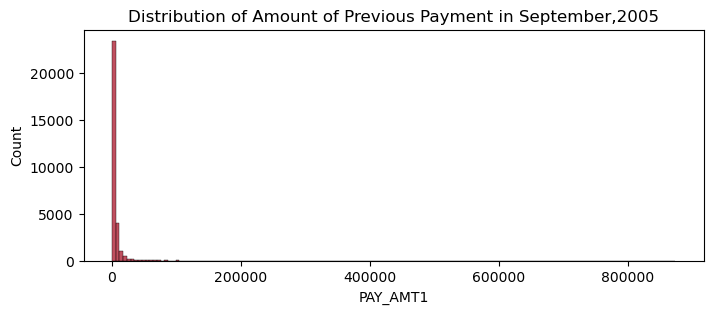

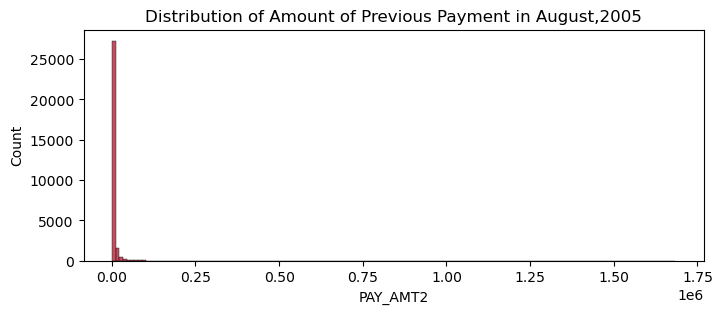

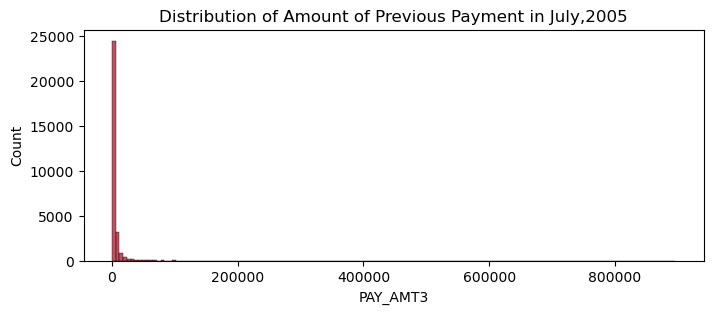

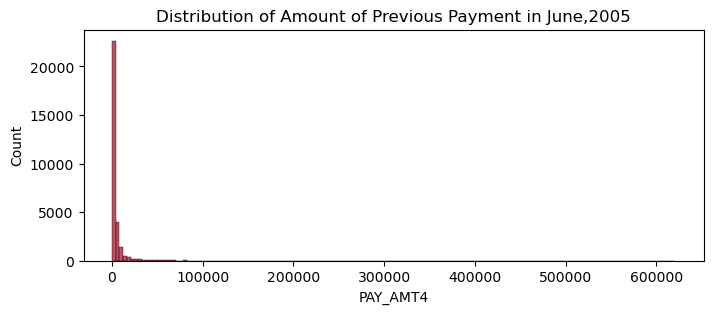

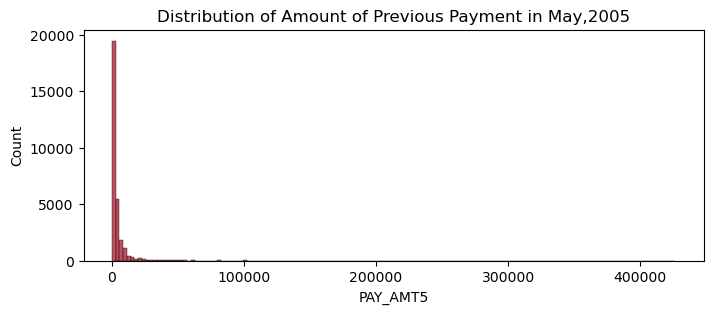

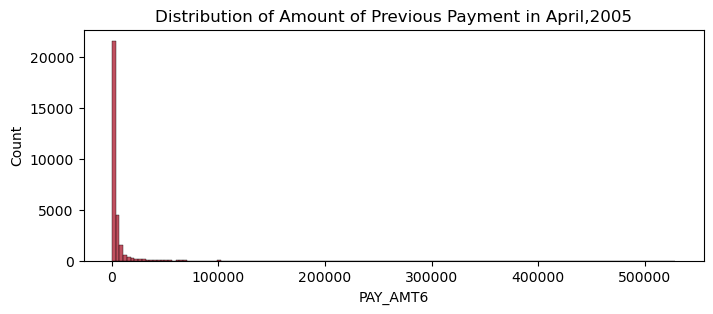

In [110]:
# plt.subplots(figsize=(20,10))

#September 2005
# plt.subplot(231)
plt.figure(figsize = (8,3))
sns.histplot(x = 'PAY_AMT1', data = df, kde = False, bins = 150) 
#sns.histplot(x = 'PAY_AMT1', data = df) #sns.displot(x = 'PAY_AMT2', data = df, kde = True) 
plt.ylabel('Count')
plt.title("Distribution of Amount of Previous Payment in September,2005")
plt.show()

#August 2005
# plt.subplot(232)
plt.figure(figsize = (8,3))
sns.histplot(x = 'PAY_AMT2', data = df, kde = False, bins = 150) 
plt.ylabel('Count')
plt.title("Distribution of Amount of Previous Payment in August,2005")
plt.show()

#July 2005
# plt.subplot(233)
plt.figure(figsize = (8,3))
sns.histplot(x = 'PAY_AMT3', data = df, kde = False, bins = 150) 
plt.ylabel('Count')
plt.title("Distribution of Amount of Previous Payment in July,2005")
plt.show()

#June 2005
# plt.subplot(234)
plt.figure(figsize = (8,3))
sns.histplot(x = 'PAY_AMT4', data = df, kde = False, bins = 150) 
plt.ylabel('Count')
plt.title("Distribution of Amount of Previous Payment in June,2005")
plt.show()

#May 2005
# plt.subplot(235)
plt.figure(figsize = (8,3))
sns.histplot(x = 'PAY_AMT5', data = df, kde = False, bins = 150) 
plt.ylabel('Count')
plt.title("Distribution of Amount of Previous Payment in May,2005")
plt.show()

#April 2005
# plt.subplot(236)
plt.figure(figsize = (8,3))
sns.histplot(x = 'PAY_AMT6', data = df, kde = False, bins = 150) 
plt.ylabel('Count')
plt.title("Distribution of Amount of Previous Payment in April,2005")
plt.show()

# df["PAY_AMT1"].describe()
# df["PAY_AMT2"].describe()
# df["PAY_AMT3"].describe()
# df["PAY_AMT4"].describe()
# df["PAY_AMT5"].describe()
# df["PAY_AMT6"].describe()


## 2.9. Analysis of Default and Non-Default Credit Card Holders

/var/folders/qr/nrj_437j6c97gz0h835gbb2r0000gn/T/ipykernel_15310/1485401335.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


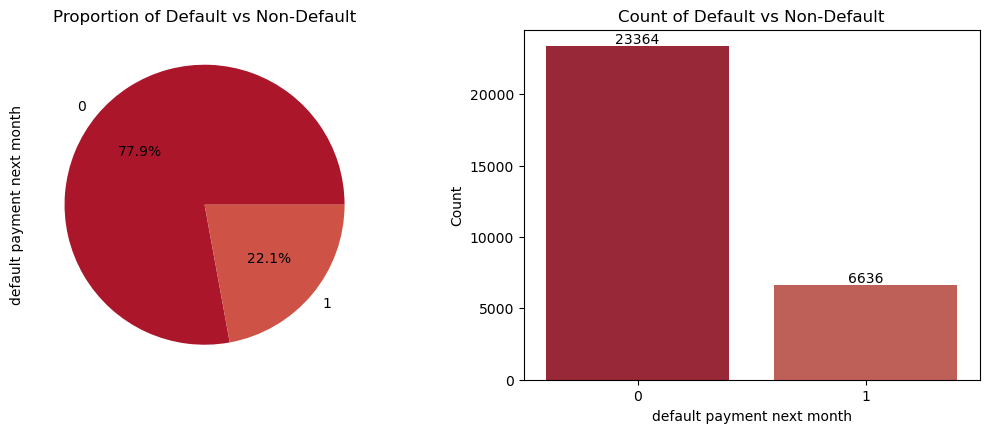

In [111]:
#Pie Chart for proportion
# df.replace({"default payment next month": "Default_Status"}, inplace = True)
plt.subplots(figsize=(20,10))
plt.subplot(231)
default_counts = df["default payment next month"].value_counts()
default_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Default vs Non-Default')

#Bar Chart for count
plt.subplot(232)
ax = sns.countplot(x = "default payment next month", data = df) 
abs_values = df['default payment next month'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
## plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Count of Default vs Non-Default")

plt.show()

# 3. Data Pre-Processing


## 3.1. Data Validation

### 3.1.1. 
To ensure there are no invalid values in our data based on the database description, we replaced values which are inconsistent. This includes replacing education levels of values 0, 5 and 6 with 4, replacing marriage statuses of 0 with 3, and payment statuses of values -2 and 0 with -1.

### 3.1.2. 
From the data exploratory process, we also discovered various outlier values for bill amounts, previous payment amounts and which we will be removing to ensure the data is valid and not noisy

In [112]:

#Replacing payment status values
df["PAY_0"].replace({-2:-1,0:-1}, inplace=True)
df["PAY_2"].replace({-2:-1,0:-1}, inplace=True)
df["PAY_3"].replace({-2:-1,0:-1}, inplace=True)
df["PAY_4"].replace({-2:-1,0:-1}, inplace=True)
df["PAY_5"].replace({-2:-1,0:-1}, inplace=True)
df["PAY_6"].replace({-2:-1,0:-1}, inplace=True)

#Replacing Marriage values
df['MARRIAGE'].replace({0:"Others_Marriage", 1: "Married", 2: "Single", 3:"Others_Marriage"}, inplace = True)

#Replacing Education values
df["EDUCATION"].replace({0: "Others_Education", 1: "Graduate School", 2: "University", 3: "High School", \
                         4: "Others_Education", 5: "Others_Education", 6: "Others_Education"}, inplace=True)

# df.head()

## 3.2. Renaming Columns

To ensure our data is as clear and consistent as possible, we renamed columns such as PAY_0,PAY_2,...,PAY_6 to PAY_Sep,PAY_Aug,...,PAY_Apr instead. 
We also replaced the column title "default payment next month" to "Default_Status".


In [113]:
df = df.rename(columns={"default payment next month": "Default_Status"})
df = df.rename(columns={"PAY_0": "PAY_Sep", "PAY_2": "PAY_Aug", "PAY_3": "PAY_Jul", "PAY_4": "PAY_Jun", "PAY_5": "PAY_May", "PAY_6": "PAY_Apr"})

## 3.3. Data Transformation
3.3.1 We remove column 'ID' as it is not required for our analysis of the data since we can assume each observation is independent of each other. We also replace values of "SEX" to 0 and 1.

In [114]:
df_processed = df
df_processed = df_processed.drop(columns=["ID"])
df_processed["SEX"].replace({"Male": 0, "Female": 1}, inplace=True)
df_processed.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sep,PAY_Aug,PAY_Jul,PAY_Jun,PAY_May,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Status
0,20000,1,University,Married,24,2,2,-1,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,120000,1,University,Single,26,-1,2,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,1,University,Single,34,-1,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,1,University,Married,37,-1,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,0,University,Married,57,-1,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 3.3.2 One Hot Encoding 
We perform one hot encoding on categorical variables like Education and Marriage which have >2 categories each

In [115]:
#Education
education_encoded = pd.get_dummies(df_processed["EDUCATION"])
education_encoded = education_encoded.rename(columns={"Others": "Others_Education"}) 
df_processed = df_processed.drop(columns=["EDUCATION"]) #drop original EDUCATION column

# #Marriage
marriage_encoded = pd.get_dummies(df_processed["MARRIAGE"])
marriage_encoded = marriage_encoded.rename(columns={"Others": "Others_Marriage"}) 
df_processed = df_processed.drop(columns=["MARRIAGE"]) #drop original MARRIAGE column

encoded_data = pd.concat([marriage_encoded, education_encoded], axis = 1)
df_processed = pd.concat([df_processed, encoded_data], axis = 1)
df_processed = df_processed.drop(columns=["Others_Education","Others_Marriage"], axis=1) #encoding: ensure n - 1 dummy variables 
df_processed.head()

,LIMIT_BAL,SEX,AGE,PAY_Sep,PAY_Aug,PAY_Jul,PAY_Jun,PAY_May,PAY_Apr,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Status,Married,Single,Graduate School,High School,University
0,20000,1,24,2,2,-1,-1,-1,-1,3913,...,0,0,0,0,1,1,0,0,0,1
1,120000,1,26,-1,2,-1,-1,-1,2,2682,...,1000,1000,0,2000,1,0,1,0,0,1
2,90000,1,34,-1,-1,-1,-1,-1,-1,29239,...,1000,1000,1000,5000,0,0,1,0,0,1
3,50000,1,37,-1,-1,-1,-1,-1,-1,46990,...,1200,1100,1069,1000,0,1,0,0,0,1
4,50000,0,57,-1,-1,-1,-1,-1,-1,8617,...,10000,9000,689,679,0,1,0,0,0,1


### 3.3.3 Min-Max Scaling 

As our features vary greatly in ranges, such as Pay_Sep to Pay_Apr with values ranging from -1 to 9 compared with PAY_AMT1 to PAY_AMT6 with values roughly ranging from 0 to 800,000, we decided to perform min-max scaling to ensure these large discrepencies do not interfere with the performance of our machine models later on. 

In [116]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_processed)
df_scaled = pd.DataFrame(scaled_data, columns=df_processed.columns)
df_scaled.head()

,LIMIT_BAL,SEX,AGE,PAY_Sep,PAY_Aug,PAY_Jul,PAY_Jun,PAY_May,PAY_Apr,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Status,Married,Single,Graduate School,High School,University
0,0.010101,1.0,0.051724,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.149982,...,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,1.0
1,0.111111,1.0,0.086207,0.000000,0.333333,0.0,0.0,0.0,0.333333,0.148892,...,0.001116,0.001610,0.000000,0.003783,1.0,0.0,1.0,0.0,0.0,1.0
2,0.080808,1.0,0.224138,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.172392,...,0.001116,0.001610,0.002345,0.009458,0.0,0.0,1.0,0.0,0.0,1.0
3,0.040404,1.0,0.275862,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.188100,...,0.001339,0.001771,0.002506,0.001892,0.0,1.0,0.0,0.0,0.0,1.0
4,0.040404,0.0,0.620690,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.154144,...,0.011160,0.014493,0.001615,0.001284,0.0,1.0,0.0,0.0,0.0,1.0


# 4. Feature Selection
For our feature selection, we will be using a hybrid approach that combines filter methods with wrapper/embedded methods to improve the feature selection process. We will start by conducting the filter method via the chi-squared test which is computationally efficient and can handle a large number of features. After removing less informative features through the filter method, we will decide between applying the wrapper method via forward selection or applying the embedded method via random forest. To ensure we are getting the best subset of features, we will experiment using both combinations of chi-squared test & forward selection vs chi-squared test & random forest, and selecting the best outcome.

/var/folders/qr/nrj_437j6c97gz0h835gbb2r0000gn/T/ipykernel_15310/116257600.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


Text(0.5, 1.0, 'Test Set')

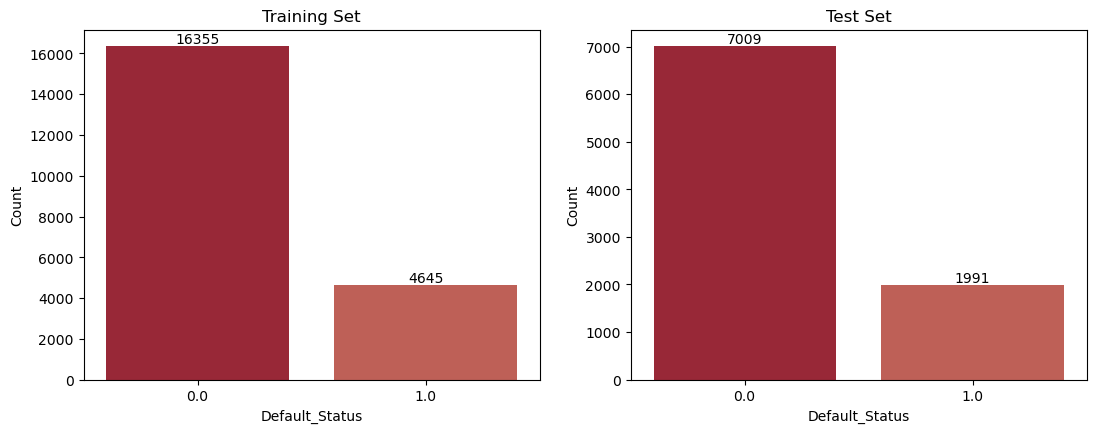

In [117]:
#Getting train and test data
df2 = df_scaled
x = df2.drop('Default_Status', axis=1)
y = df2['Default_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

#Check stratified sampling
plt.subplots(figsize=(20,10))
plt.subplot(231)
ax = sns.countplot(x = "Default_Status", data = train_data) 
abs_values = train_data["Default_Status"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.ylabel('Count')
plt.title("Training Set")

plt.subplot(232)
ax = sns.countplot(x = "Default_Status", data = test_data) 
abs_values = test_data["Default_Status"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.ylabel('Count')
plt.title("Test Set")

## 4.1. Filter Method

### 4.1.1. Correlation Method

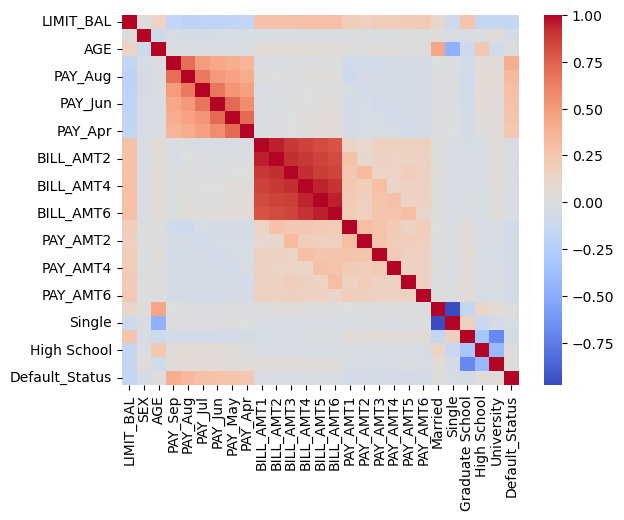

In [118]:
#Correlation method
corr_matrix = train_data.corr()
corr_with_target = corr_matrix["Default_Status"]
threshold = 0.5
selected_features = corr_with_target[abs(corr_with_target) > threshold]

#X = train_data[selected_features.index.values]
#y = train_data['Default_Status']

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


From the correlation matrix, the features generally do not have a very strong correlation with the target value, and is not a very insightful method for feature selection. Thus, we will move on to perform the Chi-Squared Method for feature selection.

### 4.1.2. Chi Squared Method

In [119]:
#Chi Squared method
# df2 = df_scaled
X = x_train #Matrix of the features excluding Default Status
y = y_train #The target variable, Default Status
k_best = SelectKBest(chi2, k=15) #Selects the top 15 most important features to include based on their Chi-Squared values
# k_best.fit(X, y) #Apply Feature Selection
X_kbest = k_best.fit_transform(X, y)
X.columns[k_best.get_support()]

chi2_scores = k_best.scores_
p_values = k_best.pvalues_

k_best_features = k_best.get_support()
feature_names = pd.DataFrame(X.columns)

#Store the unselected features results in a dataframe
unselected_features = ~k_best_features
unselected_df = pd.DataFrame({'Unselected feature': feature_names[unselected_features][0], 
                              'Chi-squared score': chi2_scores[unselected_features], 
                              'p-value': p_values[unselected_features]})

#Store the k best features results in a dataframe
results_df = pd.DataFrame({'Selected Feature': feature_names[k_best_features][0], 
                           'Chi-squared score': chi2_scores[k_best_features], 
                           'p-value': p_values[k_best_features]})

# # Concatenate the selected and unselected dataframes
# all_results_df = pd.concat([results_df, unselected_df], axis=0)
# all_results_df
unselected_df, results_df

(   Unselected feature  Chi-squared score   p-value
 2                 AGE           0.505280  0.477189
 9           BILL_AMT1           0.259722  0.610311
 10          BILL_AMT2           0.242426  0.622460
 11          BILL_AMT3           0.090970  0.762948
 12          BILL_AMT4           0.071367  0.789357
 13          BILL_AMT5           0.086880  0.768182
 14          BILL_AMT6           0.020236  0.886879
 15           PAY_AMT1           6.096370  0.013546
 16           PAY_AMT2           3.963116  0.046508
 17           PAY_AMT3           4.336906  0.037295
 18           PAY_AMT4           5.663497  0.017322,
    Selected Feature  Chi-squared score        p-value
 0         LIMIT_BAL          54.701360   1.403091e-13
 1               SEX          15.004928   1.072308e-04
 3           PAY_Sep         835.631399  9.668561e-184
 4           PAY_Aug         711.373339  1.005831e-156
 5           PAY_Jul         538.328837  4.355034e-119
 6           PAY_Jun         519.319419  5.95

From the results of the chi-squared method, the top 15 selected features have the highest chi-squared values >= 10.39 and lowest p-values <= 0.00126. For these features, there is sufficient evidence to reject H0 that these features are independent of 'Default_Status', and we can accept that they are associated with 'Default_Status' instead. This is an indication that these features are the most associated with the target variable 'Default_Status' and should be included in the model.

## 4.2. Wrapper Method

### 4.2.1. Forward Selection

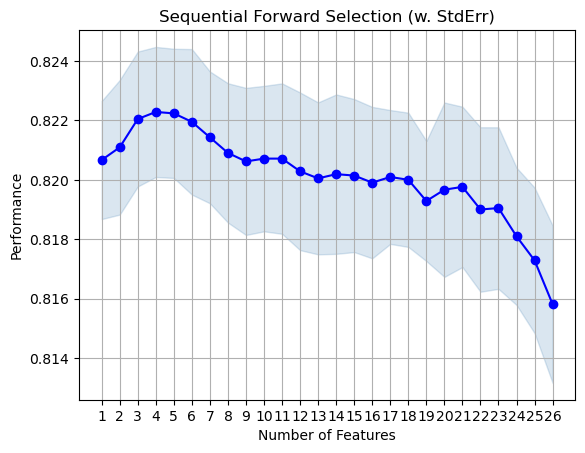

In [120]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Perform forward selection using the SequentialFeatureSelector
selector = SequentialFeatureSelector(LogisticRegression(max_iter=1000, solver='saga'), k_features = 26, forward = True, floating = False, scoring = 'accuracy', cv = 5)
sfit = selector.fit(X, y)
fig = plot_sfs(selector.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

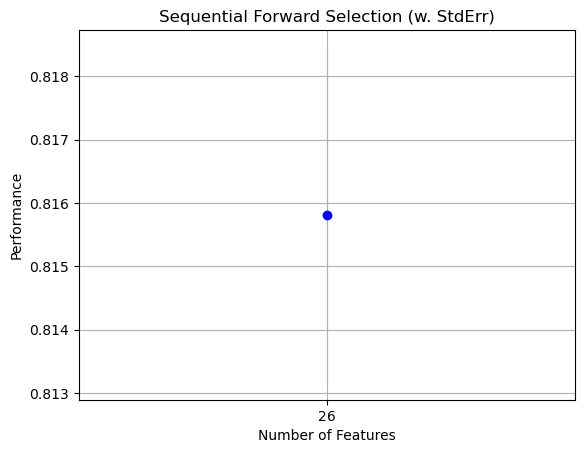

In [121]:
selector = SequentialFeatureSelector(LogisticRegression(max_iter=1000, solver='saga'), k_features = 26, forward = False, floating = False, scoring = 'accuracy', cv = 5)
sfit = selector.fit(X, y)
fig = plot_sfs(selector.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [122]:
selector = SequentialFeatureSelector(LogisticRegression(max_iter=1000, solver='saga'), k_features = 4, forward = True, floating = False, scoring = 'accuracy', cv = 5)
sfit = selector.fit(X, y)
forawrd = selector.k_feature_names_  
Columns = X.columns

forward = []
for col in Columns:
    if col in forawrd:
        forward.append(True)
    else:
        forward.append(False)

df_sfs_results = pd.DataFrame(selector.subsets_).transpose()
df_sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[0.8152380952380952, 0.8254761904761905, 0.821...",0.820667,"(PAY_Sep,)"
2,"(3, 8)","[0.8154761904761905, 0.8233333333333334, 0.820...",0.821095,"(PAY_Sep, PAY_Apr)"
3,"(3, 7, 8)","[0.815952380952381, 0.8247619047619048, 0.8233...",0.822048,"(PAY_Sep, PAY_May, PAY_Apr)"
4,"(3, 7, 8, 18)","[0.8164285714285714, 0.8252380952380952, 0.823...",0.822286,"(PAY_Sep, PAY_May, PAY_Apr, PAY_AMT4)"


### 4.2.2. Backward Selection

In [123]:
from sklearn.feature_selection import RFE

X = train_data.drop("Default_Status", axis=1)
y = train_data["Default_Status"]


model = LogisticRegression(max_iter=1000, solver='saga')
rfe = RFE(model, n_features_to_select = 4)
fit = rfe.fit(X, y)
Columns = X.columns
RFE_support = rfe.support_
RFE_ranking = rfe.ranking_
dataset = pd.DataFrame({'Columns': Columns, 'RFE_support': RFE_support, 'RFE_ranking': RFE_ranking}, columns=['Columns', 'RFE_support', 'RFE_ranking'])
dataset

,Columns,RFE_support,RFE_ranking
0,LIMIT_BAL,False,2
1,SEX,False,21
2,AGE,False,14
3,PAY_Sep,True,1
4,PAY_Aug,False,18
5,PAY_Jul,False,7
6,PAY_Jun,True,1
7,PAY_May,False,13
8,PAY_Apr,False,4
9,BILL_AMT1,False,17


## 4.3. Embedded Method
### 4.3.1. Random Forest 

In [124]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

X = train_data.drop("Default_Status", axis=1)
y = train_data["Default_Status"]

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
Columns = X.columns
dataset = pd.DataFrame()
dataset['Feature'] = Columns 
dataset['Score'] = importance
dataset['Forward'] = forward
dataset['Backward'] = RFE_support
dataset['chi'] = k_best_features
dataset.sort_values(by='Score', ascending=False, inplace= True)
dataset

,Feature,Score,Forward,Backward,chi
3,PAY_Sep,0.095826,True,True,True
2,AGE,0.067904,False,False,False
9,BILL_AMT1,0.062403,False,False,False
0,LIMIT_BAL,0.061016,False,False,True
10,BILL_AMT2,0.055412,False,False,False
11,BILL_AMT3,0.052269,False,False,False
15,PAY_AMT1,0.051175,False,True,False
14,BILL_AMT6,0.050764,False,False,False
13,BILL_AMT5,0.050711,False,False,False
12,BILL_AMT4,0.050652,False,False,False


In [125]:
print(Columns)

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun',
       'PAY_May', 'PAY_Apr', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Married', 'Single',
       'Graduate School', 'High School', 'University'],
      dtype='object')


In [126]:
final_features = ['LIMIT_BAL', 'SEX', 'PAY_Sep', 'Married', 'PAY_Apr', 'BILL_AMT2', 'PAY_AMT6']
features_selected = X[final_features]

print(features_selected)

       LIMIT_BAL  SEX   PAY_Sep  Married   PAY_Apr  BILL_AMT2  PAY_AMT6
9133    0.040404  1.0  0.000000      0.0  0.444444   0.066579  0.000000
21244   0.242424  0.0  0.000000      1.0  0.000000   0.118107  0.009420
3209    0.090909  1.0  0.000000      0.0  0.000000   0.070966  0.000000
18344   0.010101  1.0  0.000000      0.0  0.000000   0.069271  0.000000
17487   0.151515  1.0  0.000000      0.0  0.000000   0.150002  0.004163
...          ...  ...       ...      ...       ...        ...       ...
2526    0.494949  1.0  0.333333      1.0  0.000000   0.067529  0.000000
3539    0.020202  0.0  0.333333      1.0  0.555556   0.089449  0.000000
22503   0.252525  1.0  0.000000      0.0  0.000000   0.310110  0.014187
29455   0.010101  0.0  0.222222      0.0  0.000000   0.065566  0.007566
19705   0.090909  1.0  0.000000      1.0  0.000000   0.072547  0.000000

[21000 rows x 7 columns]


From the various feature selection methods, we decided to keep features that were most associated with Default_Status. The features we selected are 

# 5. Model Selection

In [127]:
x_train, x_test, y_train, y_test = train_test_split(features_selected, y, test_size = 0.3, random_state = 1, stratify = y)
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

sm = SMOTE(random_state=1234, sampling_strategy= 1.0)
X_SMOTE, Y_SMOTE = sm.fit_resample(x_train, y_train)

## 5.1 Logistic Regression

In [159]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

lr = LogisticRegression(C = 3.73, random_state = 12253)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)
print(classification_report(y_test, y_pred_lr))
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Average Class Accuracy: ", balanced_accuracy_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4906
         1.0       0.68      0.34      0.45      1394

    accuracy                           0.82      6300
   macro avg       0.76      0.65      0.67      6300
weighted avg       0.80      0.82      0.79      6300

Accuracy:  0.8188888888888889
Average Class Accuracy:  0.6477476705536102


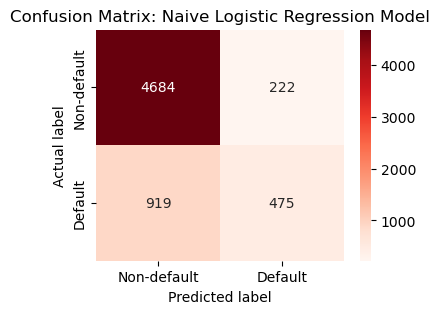

In [160]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d",
xticklabels = ['Non-default', 'Default'],
yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix: Naive Logistic Regression Model")
plt.show()

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

0.7371829271217102


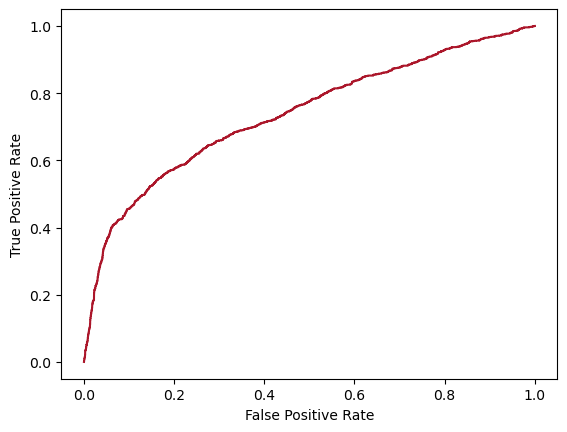

In [162]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.1.1. Tuned Logistic Regression Model 

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
logreg = LogisticRegression(random_state = 12253)
params = { 
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'], 
    "penalty" : ['l1', 'elasticnet', '12'],
    "C" : [100, 10, 1.0, 0.1, 0.01]}
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 12253)
grid_search_lr = GridSearchCV(estimator = logreg, param_grid = params, scoring = 'accuracy', cv=5, verbose = False)
 #grid_result_lr = grid_search_lr.fit(x_train, y_train)
 #print(grid_result_lr.best_params_)

In [164]:
optimisied_lr = LogisticRegression(C = 10, penalty = "l1", solver = "liblinear", random_state= 12253)
optimisied_lr.fit(x_train, y_train)

y_pred_lr_opt = optimisied_lr.predict(x_test)
print(classification_report(y_test, y_pred_lr_opt))
print("Accuracy: ", accuracy_score(y_test, y_pred_lr_opt))
print("Average Class Accuracy: ", balanced_accuracy_score(y_test, y_pred_lr_opt))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4906
         1.0       0.68      0.34      0.46      1394

    accuracy                           0.82      6300
   macro avg       0.76      0.65      0.67      6300
weighted avg       0.80      0.82      0.80      6300

Accuracy:  0.8195238095238095
Average Class Accuracy:  0.6491823907831654


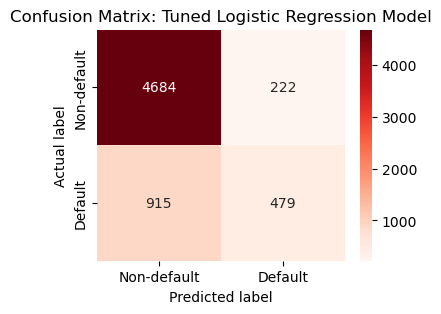

In [165]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_lr_opt)
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d",
xticklabels = ['Non-default', 'Default'],
yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix: Tuned Logistic Regression Model")
plt.show()

In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = optimisied_lr.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc1)

0.7372817725023848


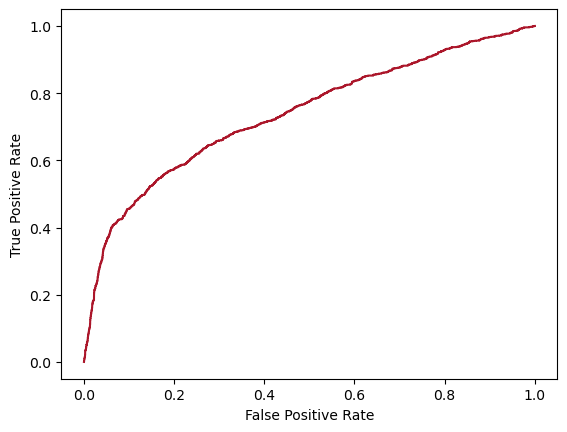

In [167]:
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5.2 Support Vector Machine

In [168]:
svm = svm.SVC(random_state = 12253, probability = True)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)
print(classification_report(y_test, y_pred_svm))
print('Accuracy: ', accuracy_score(y_test, y_pred_svm))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4906
         1.0       0.68      0.30      0.41      1394

    accuracy                           0.81      6300
   macro avg       0.75      0.63      0.65      6300
weighted avg       0.79      0.81      0.78      6300

Accuracy:  0.8133333333333334
Average Class Accuracy:  0.6292882957126255


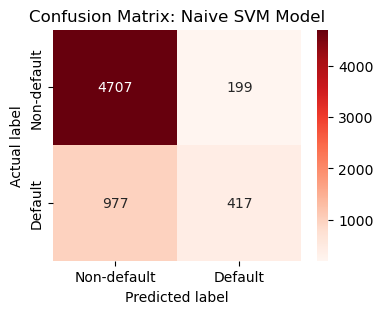

In [169]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d",
xticklabels = ['Non-default', 'Default'],
yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix: Naive SVM Model")
plt.show()

In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)


0.6859799963854174


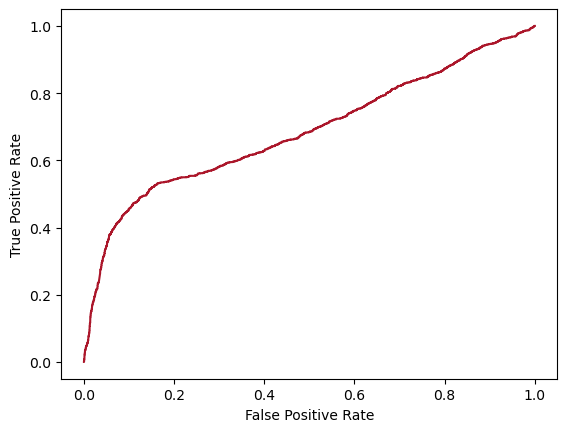

In [171]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.2.1. Tuned SVM 

In [172]:
param_grid = {
'C':[0.5, 1, 10, 100], # Regularisation Parameter
'gamma': ['scale', 0.1, 0.001, 0.0001, 1],
'kernel': ['rbf']
}
optimal_params = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, refit = True)
# optimal_params.fit(x_train ,y_train)

In [173]:
from sklearn import svm
optimised_svm = svm.SVC(random_state = 12253, C = 100, gamma = 1, kernel = 'rbf', probability = True)
optimised_svm.fit(x_train, y_train)

SVC(C=100, gamma=1, probability=True, random_state=12253)

In [174]:
y_pred_optimised_svm = optimised_svm.predict(x_test)
print(classification_report(y_test, y_pred_optimised_svm))
print('Accuracy: ', accuracy_score(y_test, y_pred_optimised_svm))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test, y_pred_optimised_svm))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4906
         1.0       0.69      0.33      0.44      1394

    accuracy                           0.82      6300
   macro avg       0.76      0.64      0.67      6300
weighted avg       0.80      0.82      0.79      6300

Accuracy:  0.8187301587301588
Average Class Accuracy:  0.6427672378447964


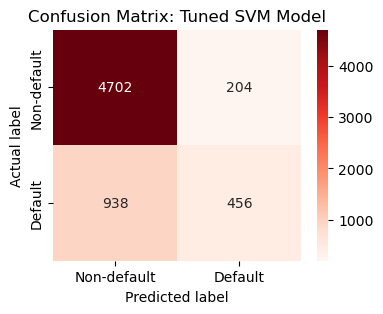

In [175]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_optimised_svm)
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d",
xticklabels = ['Non-default', 'Default'],
yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix: Tuned SVM Model")
plt.show()

In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score


y_pred_proba = optimised_svm.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc2)
print(y_pred_optimised_svm)




0.6849546948923844
[0. 0. 0. ... 0. 0. 0.]


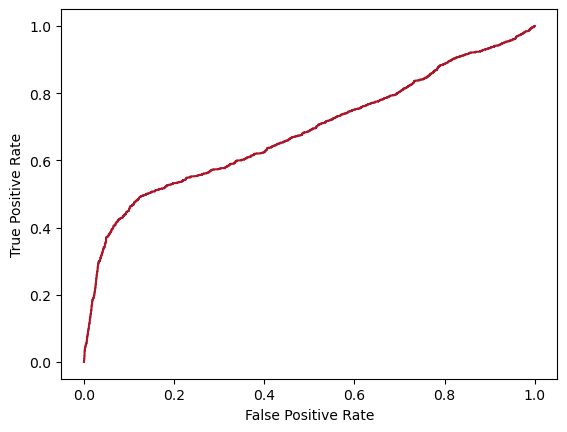

In [177]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5.3 Neural Network

In [178]:
final_features = ['LIMIT_BAL', 'SEX', 'PAY_Sep', 'Married', 'PAY_Apr', 'BILL_AMT2', 'PAY_AMT6']
features_selected = X[final_features]
x_train, x_test, y_train, y_test = train_test_split(features_selected, y, test_size = 0.3, random_state = 1, stratify = y)
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

nnmodel = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(7,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nnmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

nnmodel.fit(x_train, y_train, epochs=100, batch_size=32)
y_pred_nn = nnmodel.predict(x_test)
y_pred_classes_nn = [int(round(x[0])) for x in y_pred_nn]
print(classification_report(y_test, y_pred_classes_nn))
test_loss, test_acc = nnmodel.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
nnmodel.summary()

Epoch 1/100
460/460 [==============================] - 1s 850us/step - loss: 0.5076 - accuracy: 0.7720
Epoch 2/100
460/460 [==============================] - 0s 844us/step - loss: 0.4491 - accuracy: 0.8141
Epoch 3/100
460/460 [==============================] - 0s 780us/step - loss: 0.4462 - accuracy: 0.8180
Epoch 4/100
460/460 [==============================] - 1s 1ms/step - loss: 0.4455 - accuracy: 0.8182
Epoch 5/100
460/460 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8191
Epoch 6/100
460/460 [==============================] - 0s 989us/step - loss: 0.4447 - accuracy: 0.8194
Epoch 7/100
460/460 [==============================] - 0s 804us/step - loss: 0.4446 - accuracy: 0.8208
Epoch 8/100
460/460 [==============================] - 0s 880us/step - loss: 0.4447 - accuracy: 0.8193
Epoch 9/100
460/460 [==============================] - 0s 924us/step - loss: 0.4441 - accuracy: 0.8207
Epoch 10/100
460/460 [==============================] - 0s 860us/step - loss:

In [179]:
print('Test accuracy:', test_acc)
print('Average Class Accuracy: ', balanced_accuracy_score(y_test, y_pred_classes_nn))

Test accuracy: 0.8192063570022583
Average Class Accuracy:  0.6525732552474321


In [180]:
y_pred_nn = nnmodel.predict(x_test)
y_pred_classes_nn = [int(round(x[0])) for x in y_pred_nn]
print(classification_report(y_test, y_pred_classes_nn))

197/197 [==============================] - 0s 577us/step
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4906
         1.0       0.67      0.35      0.46      1394

    accuracy                           0.82      6300
   macro avg       0.76      0.65      0.68      6300
weighted avg       0.80      0.82      0.80      6300



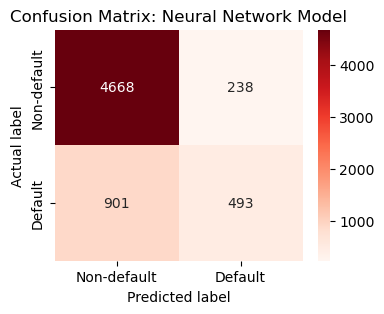

In [181]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_classes_nn)
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d",
xticklabels = ['Non-default', 'Default'],
yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix: Neural Network Model")
plt.show()

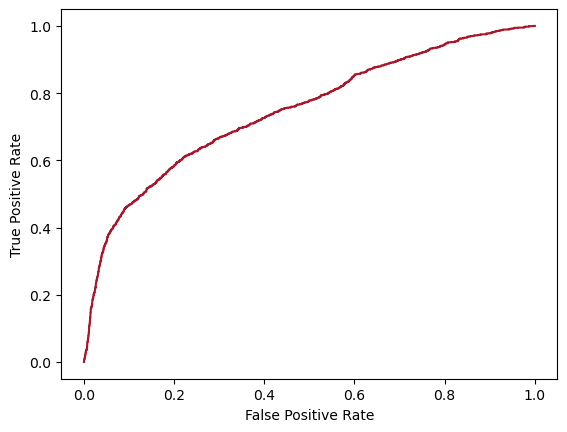

In [182]:

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_nn)
auc = metrics.roc_auc_score(y_test, y_pred_nn)
# print(auc)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Tuned Neural Network Model

In [183]:
# final_features = ['LIMIT_BAL', 'SEX', 'PAY_Sep', 'Married', 'PAY_Apr', 'BILL_AMT2', 'PAY_AMT6']
# features_selected = X[final_features]
# x_train, x_test, y_train, y_test = train_test_split(features_selected, y, test_size = 0.3, random_state = 1, stratify = y)
# train_data = x_train.join(y_train)
# test_data = x_test.join(y_test)

tuned_nn_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(7,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

tuned_nn_model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

tuned_nn_model.fit(x_train, y_train, epochs=100, batch_size=32)

test_loss, test_acc = tuned_nn_model.evaluate(x_test, y_test)
tuned_nn_model.summary()

y_pred_nn_tuned = tuned_nn_model.predict(x_test)
y_pred_classes_nn_tuned = [int(round(x[0])) for x in y_pred_nn_tuned]
print(classification_report(y_test, y_pred_classes_nn_tuned))
test_loss, test_acc = tuned_nn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Average Class Accuracy: ', balanced_accuracy_score(y_test, y_pred_classes_nn_tuned))


Epoch 1/100


/Users/mervseah/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


460/460 [==============================] - 1s 840us/step - loss: 0.4765 - accuracy: 0.8007
Epoch 2/100
460/460 [==============================] - 0s 798us/step - loss: 0.4609 - accuracy: 0.8064
Epoch 3/100
460/460 [==============================] - 0s 786us/step - loss: 0.4592 - accuracy: 0.8073
Epoch 4/100
460/460 [==============================] - 0s 799us/step - loss: 0.4594 - accuracy: 0.8046
Epoch 5/100
460/460 [==============================] - 0s 789us/step - loss: 0.4575 - accuracy: 0.8072
Epoch 6/100
460/460 [==============================] - 0s 781us/step - loss: 0.4563 - accuracy: 0.8101
Epoch 7/100
460/460 [==============================] - 0s 784us/step - loss: 0.4561 - accuracy: 0.8071
Epoch 8/100
460/460 [==============================] - 0s 784us/step - loss: 0.4578 - accuracy: 0.8083
Epoch 9/100
460/460 [==============================] - 0s 784us/step - loss: 0.4557 - accuracy: 0.8077
Epoch 10/100
460/460 [==============================] - 0s 790us/step - loss: 0.4566 

In [184]:
y_pred_nn_tuned = tuned_nn_model.predict(x_test)
y_pred_classes_nn_tuned = [int(round(x[0])) for x in y_pred_nn_tuned]
print(classification_report(y_test, y_pred_classes_nn_tuned))
y_pred_classes_nn_tuned = np.argmax(y_pred_nn_tuned, axis=1)

197/197 [==============================] - 0s 600us/step
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4906
         1.0       0.66      0.37      0.47      1394

    accuracy                           0.82      6300
   macro avg       0.75      0.66      0.68      6300
weighted avg       0.80      0.82      0.80      6300



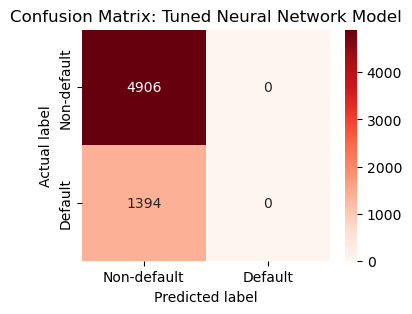

In [185]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_classes_nn_tuned)
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d",
xticklabels = ['Non-default', 'Default'],
yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix: Tuned Neural Network Model")
plt.show()

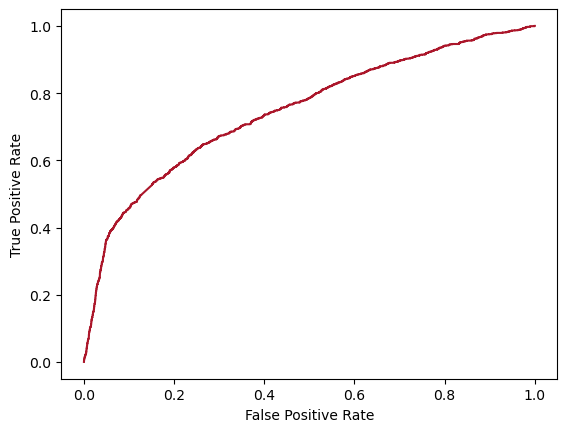

In [186]:
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_nn_tuned)
auc3 = metrics.roc_auc_score(y_test, y_pred_nn_tuned)
# print(auc)
plt.plot(fpr3,tpr3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Evaluation

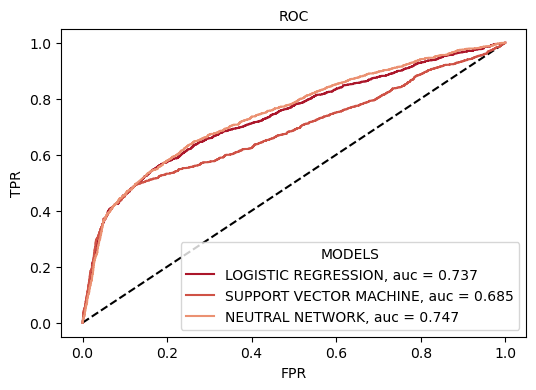

In [191]:
plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr1, tpr1, label="LOGISTIC REGRESSION, auc = " + str(round(auc1,3)))
plt.plot(fpr2, tpr2, label="SUPPORT VECTOR MACHINE, auc = " + str(round(auc2,3)))
plt.plot(fpr3, tpr3, label="NEURAL NETWORK, auc = " + str(round(auc3,3)))
plt.legend(loc=4, title='MODELS', facecolor='white')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC', size=10)
plt.show()

